Before we begin...

Questions:
* How has Covid influenced people?
 * i.e. are people being introspective, working on themselves, etc. or is something else going on?
 * Which backgrounds are most affected?

In [35]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
jewish_covid_data = pd.read_spss('2020 COVID_Jewish Engagement_High Holidays_SPSS SAV_DB.sav')

In [19]:
#list(jewish_covid_data.columns)

In [20]:
# looking into how columns are structured more...
jewish_covid_data.head()

,record,qAge,qState,q1_1,q1_2,qEthnicity_1,qEthnicity_2,qEthnicity_3,qEthnicity_4,qEthnicity_5,...,qChildren3,qMarital,qHHFaith,qOrientation_1,qOrientation_2,qOrientation_3,qHHIncome,qAbility_1,qAbility_2,ALLWT
0,2.0,63,Arizona,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,No,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$35,000 - less than $50,000","Yes, I do",NaN,1.275025
1,3.0,67,Massachusetts,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,No,Married / Domestic Partnership,Yes,Straight or heterosexual,NaN,NaN,"$150,000 to less than $200,000",No,NaN,0.758117
2,4.0,53,Florida,A man,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,Yes,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$75,000 - less than $100,000",No,NaN,1.226917
3,5.0,59,Massachusetts,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,No,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$50,000 - less than $75,000",No,NaN,1.252093
4,6.0,55,New Jersey,A woman,NaN,"White-For example, German, Irish, English, Ita...",NaN,NaN,NaN,NaN,...,Yes,Married / Domestic Partnership,No,Straight or heterosexual,NaN,NaN,"$200,000 or more",No,NaN,1.252093


In [21]:
jewish_covid_data.shape

(1414, 260)

In [22]:
jewish_covid_data.dtypes

record             float64
qAge              category
qState            category
q1_1              category
q1_2              category
                    ...   
qOrientation_3    category
qHHIncome         category
qAbility_1        category
qAbility_2        category
ALLWT              float64
Length: 260, dtype: object

In [23]:
uniques = jewish_covid_data.nunique()
print(uniques)

record            1414
qAge                73
qState              48
q1_1                 4
q1_2                 3
                  ... 
qOrientation_3       1
qHHIncome            9
qAbility_1           4
qAbility_2           1
ALLWT              253
Length: 260, dtype: int64


In [24]:
print(jewish_covid_data['q1_1'].value_counts(), '\n')
print(jewish_covid_data['q1_2'].value_counts())

A man                       712
A woman                     682
Non-binary                   11
I prefer not to disclose      9
Name: q1_1, dtype: int64 

Non-binary                   3
A woman                      3
I prefer to self describe    1
Name: q1_2, dtype: int64


## Missing values clean-up

In [25]:
# let's look at null values
nulls = jewish_covid_data.isnull().sum()
print(nulls.head(), '\n')

#show features with non-zero amount of missing values only
print(nulls[nulls!=0], '\n')

#Now as a %
nulls_percent = nulls[nulls!=0]/jewish_covid_data.shape[0]*100
print('The % of null values per feature:\n')
print(round(nulls_percent,2))

record       0
qAge         0
qState       0
q1_1         0
q1_2      1407
dtype: int64 

q1_2              1407
qEthnicity_2      1368
qEthnicity_3      1403
qEthnicity_4      1409
qEthnicity_5      1412
                  ... 
qChildren2_4      1412
qChildren3         514
qOrientation_2    1404
qOrientation_3    1413
qAbility_2        1385
Length: 162, dtype: int64 

The % of null values per feature:

q1_2              99.50
qEthnicity_2      96.75
qEthnicity_3      99.22
qEthnicity_4      99.65
qEthnicity_5      99.86
                  ...  
qChildren2_4      99.86
qChildren3        36.35
qOrientation_2    99.29
qOrientation_3    99.93
qAbility_2        97.95
Length: 162, dtype: float64


In [26]:
#let's drop the record column
jewish_covid_data = jewish_covid_data.drop(['record'],axis=1)

Text(0.5, 0, '% of missing values')

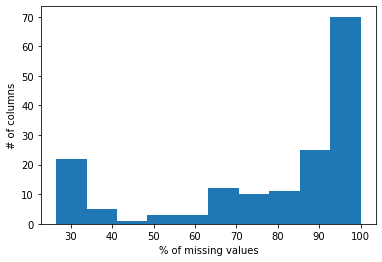

In [36]:
#Examine distribution of null-values column-wise
nulls_percent.plot.hist()
plt.ylabel('# of columns')
plt.xlabel('% of missing values')

Our histogram shows we have feature columns with all sorts of different amounts of missing values, starting at ~30%. Let's just drop all of these and see how the analysis goes from here...

In [38]:
#let's now also drop columns with large amounts of nulls
thresh = len(jewish_covid_data) * .2
jewish_covid_data2 = jewish_covid_data.dropna(thresh = thresh,axis = 1, inplace = False) 

In [39]:
jewish_covid_data2.shape

(1414, 157)

Reduced our dimensionality by 103 features, nice!

## What columns to focus on

Looking for actionable self-improvement questions and answers, I looked through the survey document and found the following:

Questions 3, 10 (answers 9-11), 13 (first half), 16 (answers 9-11, maybe earlier answers about yiddishkeit too?), maybe Q21 (don't like it's based on yes to Q18), Q31 (A3,6,10), Q32 (all answers but 2, 99), Q33,34, 41!! (7-10)

I will focus on question 41 and expand from there if need be.

In [81]:
#list(jewish_covid_data2.columns)

## Outcome variable clean-up/analysis

Q41:

* 7)   The pandemic has made it feel more important to connect to God.
* 8)   The pandemic has made it feel more important to connect to the religious or spiritual aspects of being Jewish.
* 9)   The pandemic has made it feel more important to bring Jewish practices into my home.
* 10) The pandemic has made it feel more important to live by my Jewish values in the future.

In [78]:
def likert_to_numeric(df, weights_col):
    # convert likert scale to numeric 0-4
     
    # applying function to each row in the dataframe
    # and storing result in a new column
    df['q_results'] = df.apply(np.mean * df[weights_col], axis = 1)
  
    print('\nAfter Applying Function: ')
    # printing the new dataframe
    print(df)
  
    if __name__ == '__main__':
        main()

In [79]:
likert_to_numeric(jewish_covid_data2[[
 'q41r7',
 'q41r8',
 'q41r9',
 'q41r10']], 'ALLWT')

KeyError: 'ALLWT'